In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
import scipy

In [3]:
from Helper_Functions.accessing_data import h5tree_view
from Helper_Functions.OrthoViewer import OrthoAxes
from Helper_Functions.ZBrain_contours import get_ZBrain_brain_countours, get_ZBrain_regions_countours

In [4]:
%matplotlib inline

In [5]:
http://wiki.ljp.upmc.fr/zebrain/

SyntaxError: invalid syntax (2761697869.py, line 1)

# Loading the Data

In [6]:
filepath = "content/banyuls_data/spontaneous_fish1.h5"

In [7]:
file = h5py.File(filepath, "r")
h5tree_view(file)

. content/banyuls_data/spontaneous_fish1.h5
├── 📁brain
│   ├── 🔢coordinates ⚙️(3, 54334)float32
│   │   ├── 🏷️reference brain = `zbrain atlas`
│   │   ├── 🏷️space = `RPS`
│   │   └── 🏷️unit = `mm`
│   ├── 🔢fluorescence ⚙️(5553, 54334)float32
│   ├── 🔢regions ⚙️(294, 54334)uint8
│   │   └── 🏷️origin = `zbrain atlas`
│   ├── 🔢spikes ⚙️(5553, 54334)uint8
│   ├── 🔢times ⚙️(5553, 1)float32
│   │   └── 🏷️unit = `s`


In [8]:
coords = file["/brain/coordinates"][:]
dffs = file["/brain/fluorescence"][600:, :]
regions = file["/brain/regions"][:]

# Investigating the data

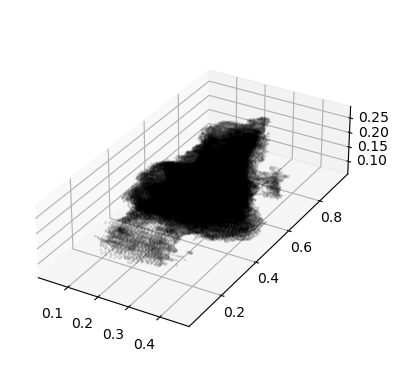

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(coords[0], coords[1], coords[2], s=1, color="k", alpha=0.1)
ax.set_aspect('equal')

In [10]:
%matplotlib inline

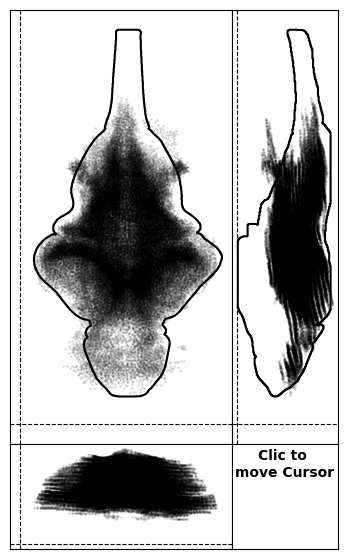

In [17]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)

In [12]:
neurons = [47375, 11727, 17677]

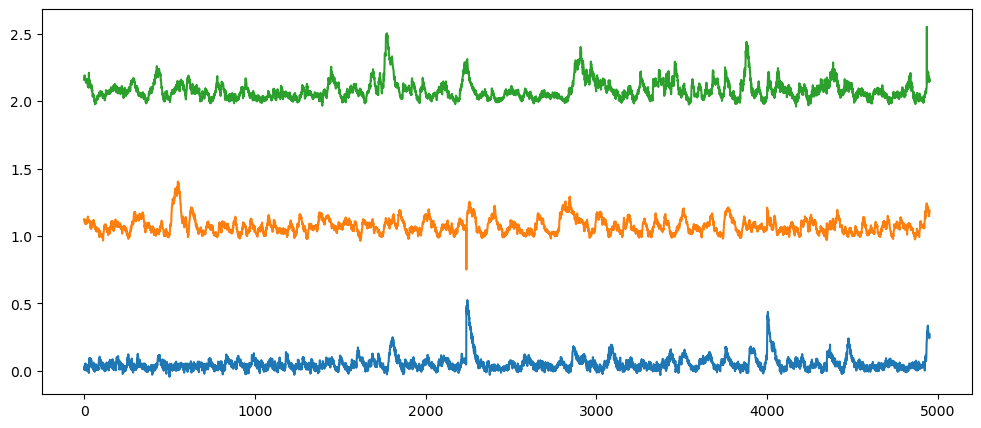

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(dffs[:,neurons]+np.arange(len(neurons)))

# Creating a 2D dataset

In [80]:
%matplotlib inline

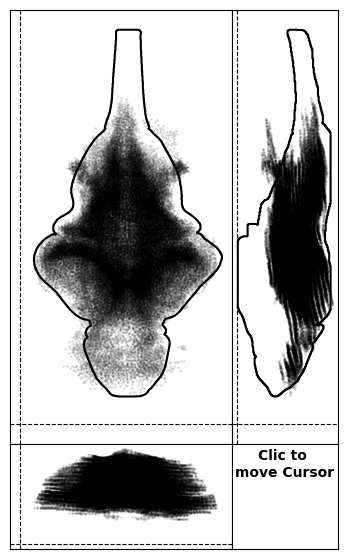

In [81]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)

In [82]:
zmin, zmax = 0.188, 0.216

In [83]:
height = (zmax-zmin)*1000
height #um

27.999999999999996

In [90]:
inds = np.where( (coords[2] > zmin)*(coords[2] < zmax))[0]
flat_coords = coords[:,inds]
flat_dffs = dffs[:,inds]

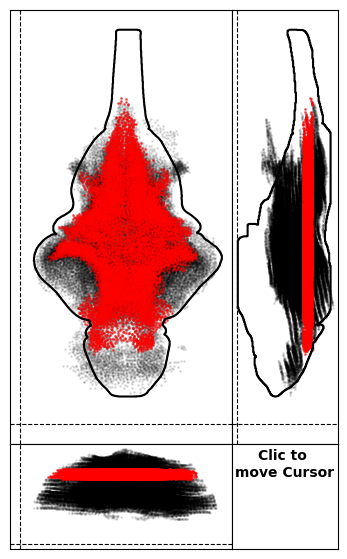

In [87]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(flat_coords, color="r", alpha=0.5, s=1)

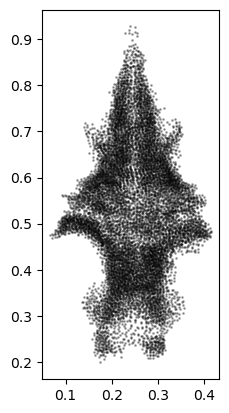

In [100]:
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, color="k", alpha=0.3)
ax.set_aspect("equal")

# Kmeans

In [14]:
from sklearn.cluster import KMeans

## On Flat data

In [91]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(flat_dffs.T)

/home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

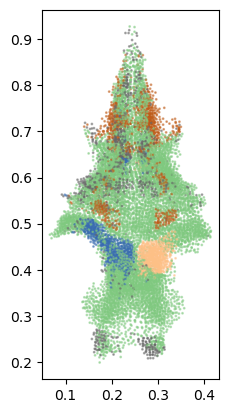

In [97]:
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, c=kmeans.labels_, cmap="Accent", alpha=0.5)
ax.set_aspect("equal")

In [169]:
from sklearn.manifold import TSNE
# https://distill.pub/2016/misread-tsne/

In [172]:
tnse = TSNE(n_components=2, perplexity=25)
X_embedded = tnse.fit_transform(flat_dffs.T)

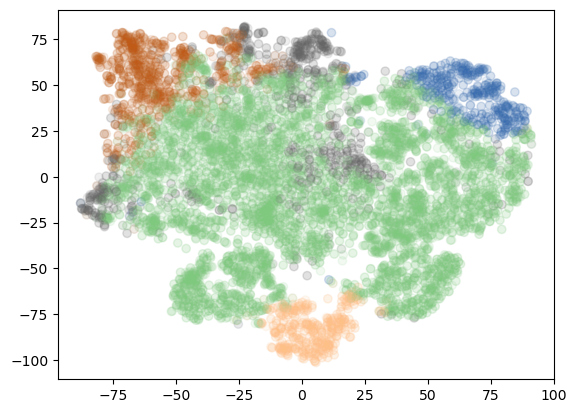

In [181]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.1, c=kmeans.labels_, cmap="Accent")

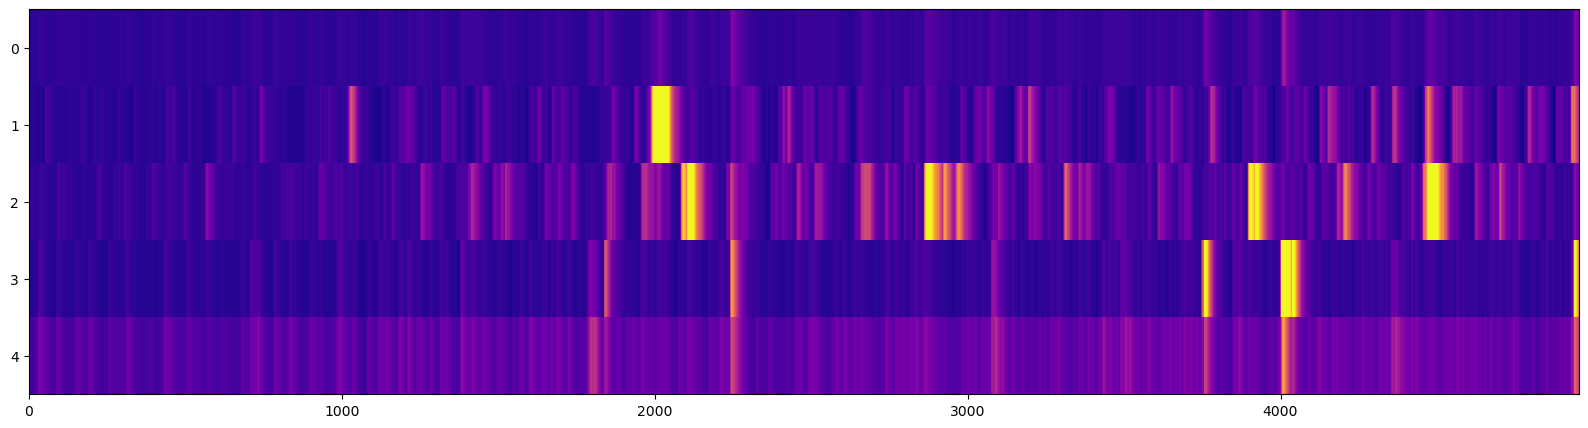

In [98]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(kmeans.cluster_centers_, aspect="auto", interpolation="none", cmap="plasma", vmin=0, vmax=0.7)

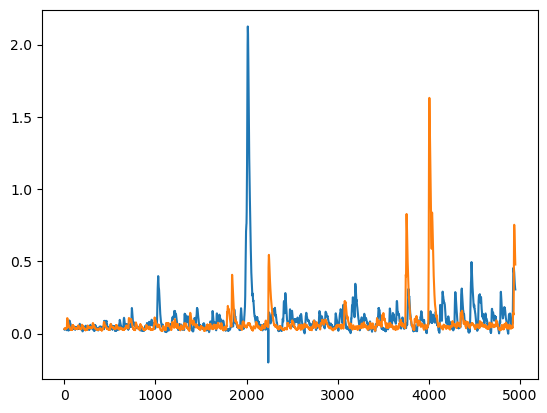

In [107]:
plt.plot(kmeans.cluster_centers_[[1,3]].T)
#plt.ylim(-10,10)

In [108]:
Y = kmeans.cluster_centers_[kmeans.labels_].T

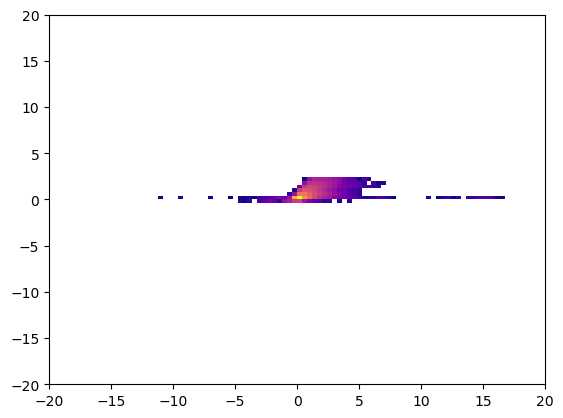

In [110]:
plt.hist2d(flat_dffs.ravel(), Y.ravel(), bins=100, cmap="plasma", norm=LogNorm(), range=[[-20,+20],[-20,+20]]);

In [111]:
C = np.corrcoef(kmeans.cluster_centers_)

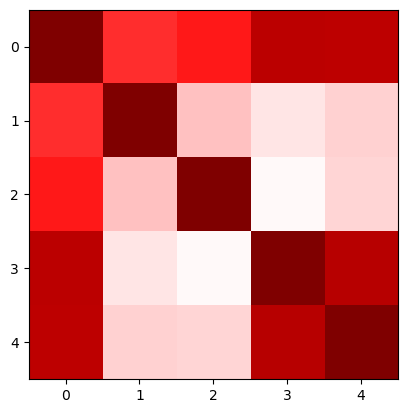

In [112]:
plt.imshow(C, cmap="seismic", vmin=-1, vmax=+1)

## On Whole Brain data

In [24]:
r = 113
inds = np.where(regions[r]==1)[0]
dff = dffs[:,inds]
coord = coords[:,inds]

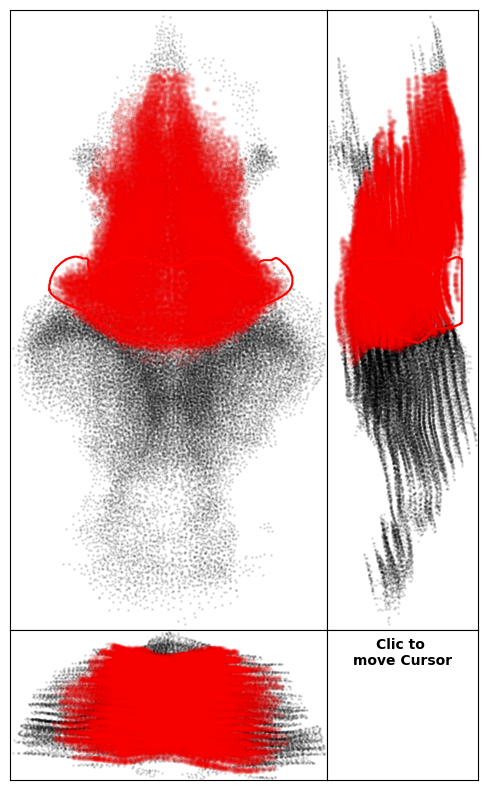

In [162]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(coord, color="r", alpha=0.1, s=10)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")


In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dff.T)

/home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

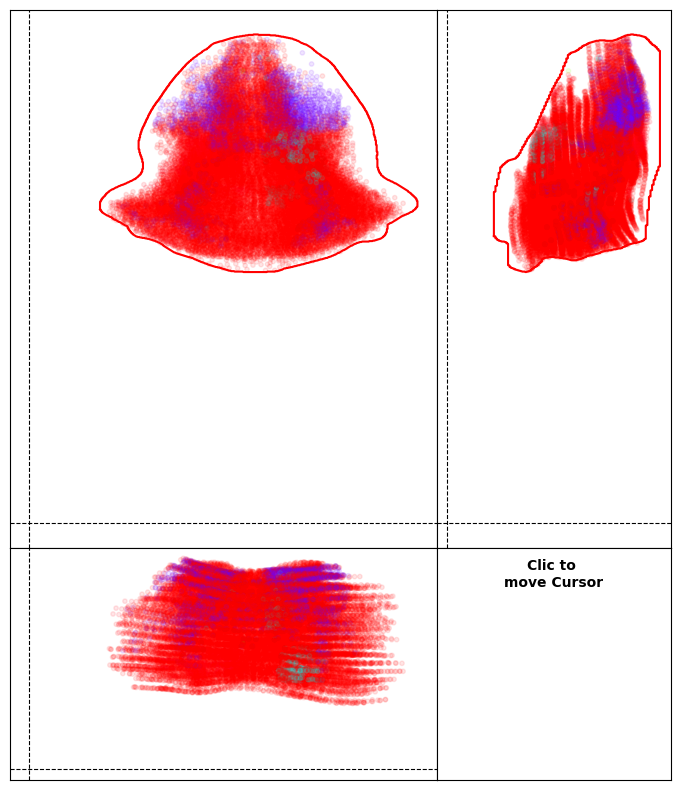

In [37]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coord, interactive=True)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")
ortho.scatter(coord, c=kmeans.labels_, alpha=0.1, s=10, cmap="hsv")

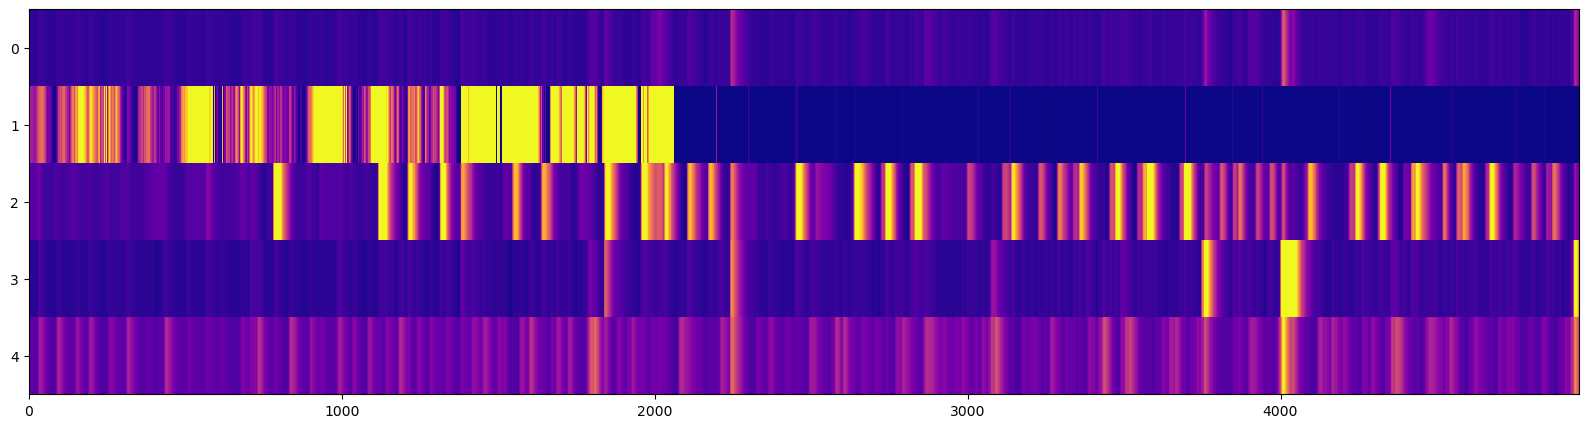

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(kmeans.cluster_centers_, aspect="auto", interpolation="none", cmap="plasma", vmin=0, vmax=0.7)

(-10.0, 10.0)

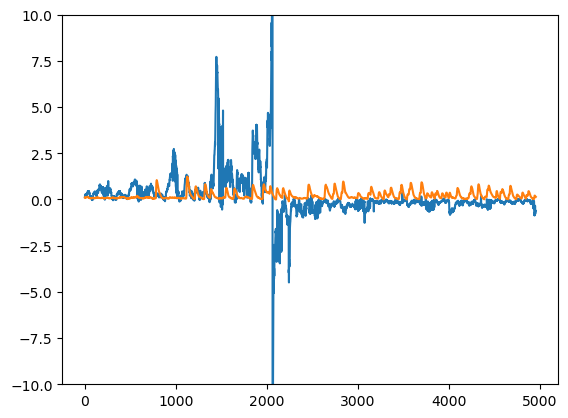

In [45]:
plt.plot(kmeans.cluster_centers_[[1,2]].T)
plt.ylim(-10,10)

In [46]:
C = np.corrcoef(kmeans.cluster_centers_)

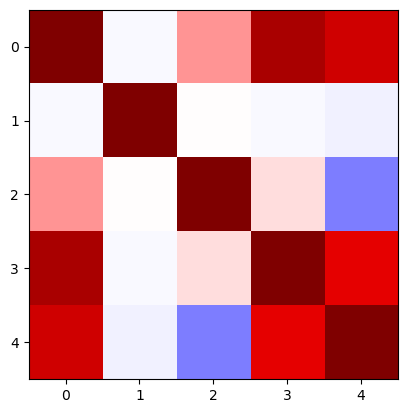

In [47]:
plt.imshow(C, cmap="seismic", vmin=-1, vmax=+1)

In [48]:
Y = kmeans.cluster_centers_[kmeans.labels_].T

In [49]:
Y.shape

(4953, 26471)

In [50]:
from matplotlib.colors import LogNorm

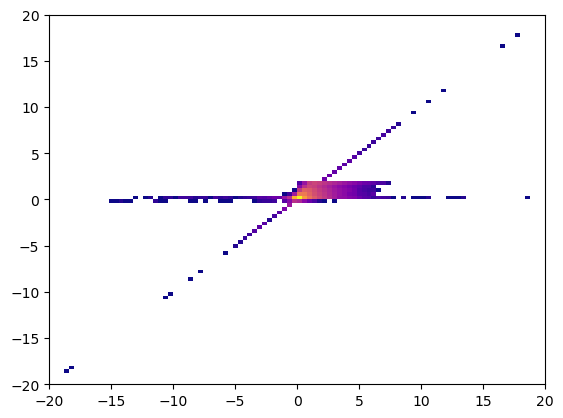

In [51]:
plt.hist2d(dff.ravel(), Y.ravel(), bins=100, cmap="plasma", norm=LogNorm(), range=[[-20,+20],[-20,+20]]);

# Activity per region with PCA

In [129]:
r = 130 # 93, 113, 65

In [130]:
inds = np.where(regions[r]==1)[0]

In [158]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")

In [132]:
dff = dffs[:,inds]
dff.shape

(4953, 3352)

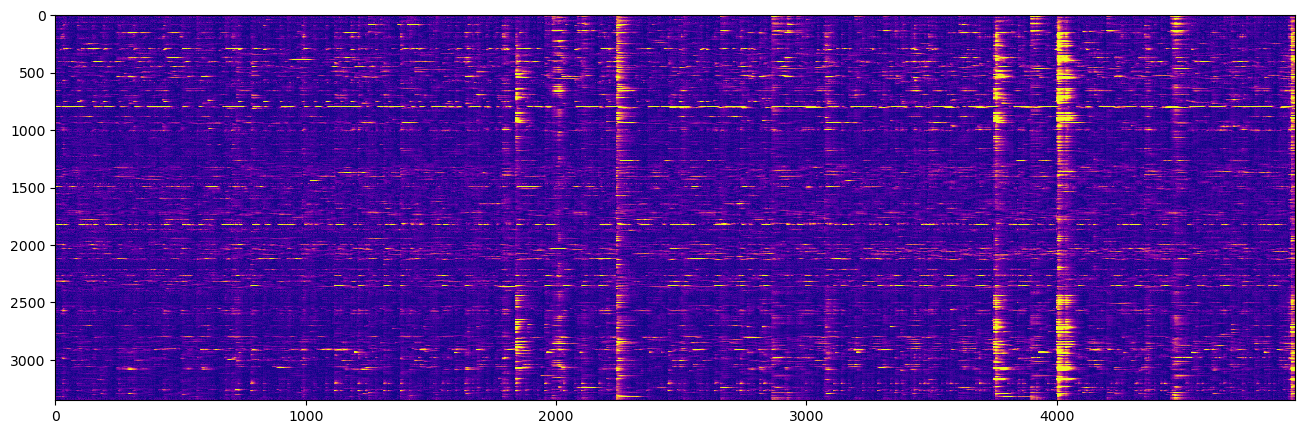

In [133]:
fig, ax = plt.subplots(figsize=(16,5))
ax.imshow(dff.T, aspect="auto", cmap="plasma", vmin=0, vmax=0.5, interpolation="none")

In [134]:
from sklearn.decomposition import PCA, FastICA

In [135]:
pca = PCA(n_components=4)
pca.fit(dff)
Y = pca.transform(dff)

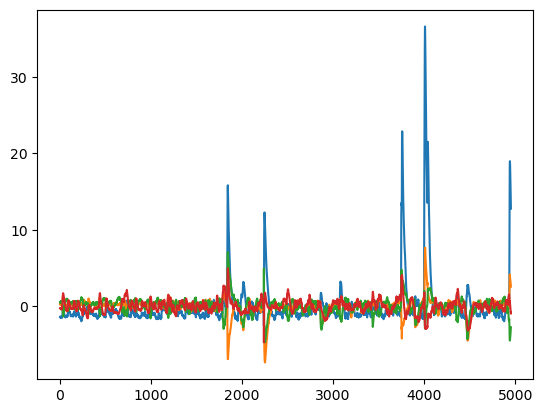

In [136]:
plt.plot(Y)
#plt.ylim(-200,200)

In [137]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.44944632, 0.04847227, 0.04370619, 0.02951409], dtype=float32),
 0.57113886)

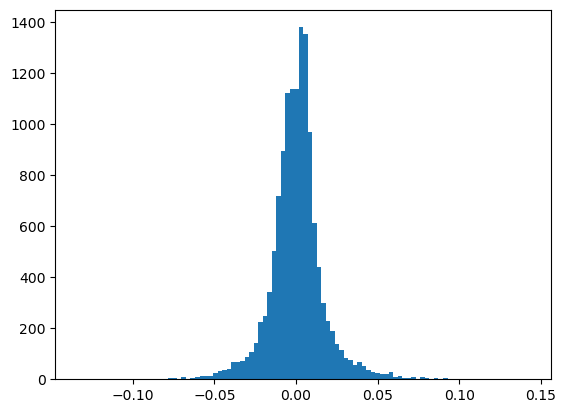

In [138]:
plt.hist(pca.components_.ravel(), bins=100);

In [166]:
%matplotlib inline

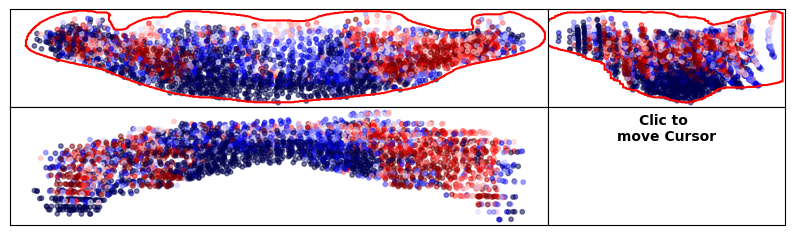

In [167]:
fig = plt.figure(figsize=(10,5))
ortho = OrthoAxes(fig, coords[:,inds], interactive=True)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")
ortho.scatter(coords[:,inds], c=pca.components_[1], cmap="seismic", vmin=-0.01, vmax=+0.01, alpha=0.5, s=10)

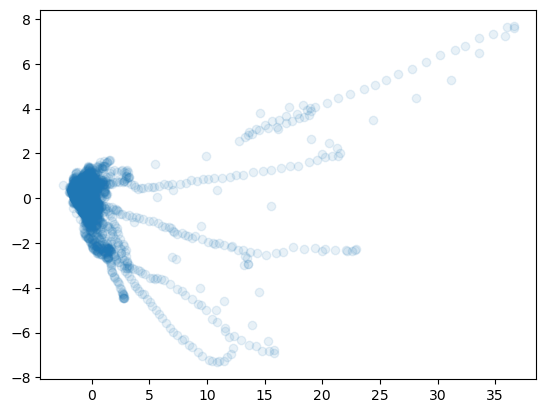

In [168]:
plt.scatter(Y[:,0], Y[:,1], alpha=0.1)